# Replicate figures of the manuscript


*   Change the currect directory to appropriate directory on your drive
*   If you are using Google Colab, make sure to mount your drive at the beginning



In [1]:
from google.colab import drive
drive.mount('gdrive')
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from dateutil.parser import parse
import datetime as dt
import pickle

# Change directory
os.chdir("/content/gdrive/MyDrive/ColabNotebooks/Thesis/Thesis_colabs/IJGIS/")

Mounted at gdrive


# Figure 5

<ipython-input-2-0fcd4c505c6d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outbreaks = outbreaks.append(pd.DataFrame({'r0': [x[0] for x in values_to_append],
<ipython-input-2-0fcd4c505c6d>:48: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap = sns.heatmap(outbreaks.pivot("Basic reproductive rate", "Relative transmission factor", "count"),


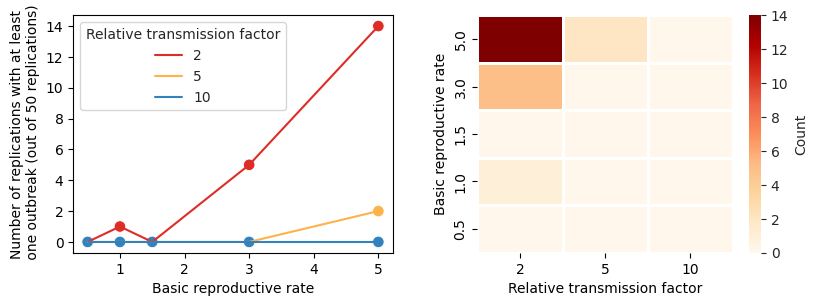

In [ ]:
# Read the CSV file of simulation results
df = pd.read_csv('emergence_r0_rho.csv')

# Separate 'r0' and 'rho' values
df['rho'] = df['r0_rho'].str[4:5].astype(int)
df['r0'] = df['r0_rho'].str[1:2].astype(int)

# An outbreak occurs if at least one person is infected in the baseline populaiton.
# Simulation only records r0_rho and replications that resulted in outbreaks.
# Thus, we need to set r0_rho combinations with no outbreak to 0.
# Count outbreaks
a = df.groupby(['r0', 'rho', 'replication']).max().reset_index()[['r0', 'rho']]
outbreaks = a.groupby(['r0', 'rho']).size().reset_index()
outbreaks.rename({0: 'count'}, axis=1, inplace=True)

# Set other cpmbinations to 0
values_to_append = [(0.5, 2), (0.5, 5), (0.5, 10), (1, 5), (1, 10), (1.5, 2), (1.5, 5), (1.5, 10), (3, 5), (3, 10), (5, 10)]
outbreaks = outbreaks.append(pd.DataFrame({'r0': [x[0] for x in values_to_append],
                                           'rho': [x[1] for x in values_to_append],
                                           'count': 0}), ignore_index=True)
outbreaks['r0'] = outbreaks['r0'].astype('float')
outbreaks['count'] = outbreaks['count'].astype(int)
outbreaks = outbreaks.rename({'rho':'Relative transmission factor',
                              'r0':'Basic reproductive rate'}, axis=1)

# Define palette
custom_palette = ['#de2d26', '#feb24c', '#3182bd']

fig, ax = plt.subplots(1, 2, figsize=(8.5, 3.5))
sns.set_style("whitegrid", {'axes.grid': False})
plt.tight_layout(pad=3)
# Left panel
sns.scatterplot(data=outbreaks, x='Basic reproductive rate',
                y='count', hue='Relative transmission factor',
                palette=custom_palette, ax=ax[0], markers='o',
                s=70, legend=False)

sns.lineplot(data=outbreaks, x='Basic reproductive rate',
             y='count', hue='Relative transmission factor',
             palette=custom_palette, ax=ax[0])

ax[0].set_xlabel('Basic reproductive rate')
ax[0].set_ylabel('Number of replications with at least\n one outbreak (out of 50 replications)')

# Right panel
heatmap = sns.heatmap(outbreaks.pivot("Basic reproductive rate", "Relative transmission factor", "count"),
                      cmap='OrRd', linewidths=1, cbar=True, ax=ax[1], cbar_kws={'label': 'Count'})
ax[1].invert_yaxis()
ax[1].set_title('')

plt.show()

# Figure 6

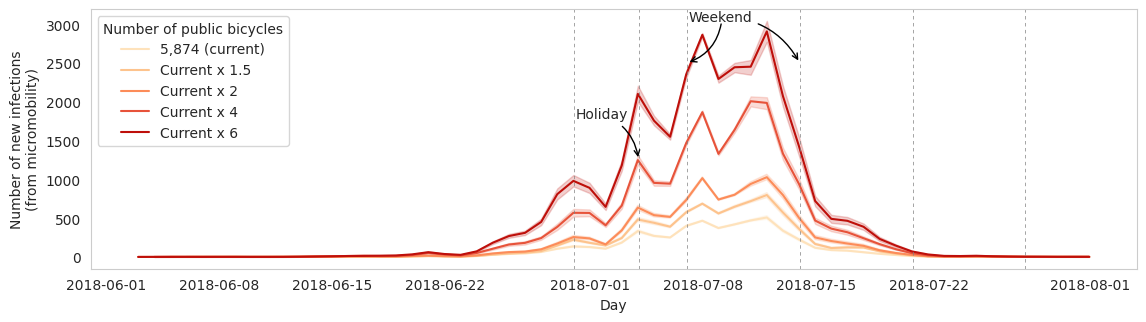

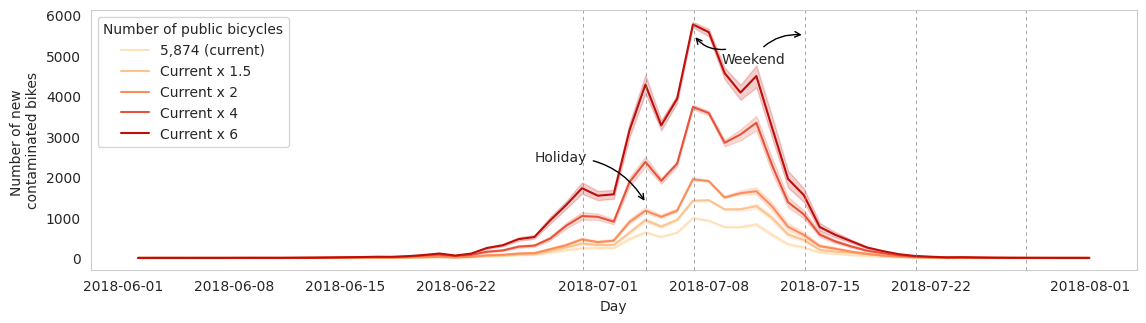

In [ ]:
# a)
# List all files in the directory
files = os.listdir()

# Initialize an empty DataFrame for micromobility infections
im = pd.DataFrame(columns=['fleet_size', 'time', 'replication'])

# Process relevant files
for f in files:
    if 'micro_infections_nb' in f:
        # Read the CSV file and select columns of interest
        a = pd.read_csv(f, usecols=['cyclist', 'start_of_infection', 'replication', 'fleet_size'])

        # Set type of the columns
        a['start_of_infection'] = pd.to_datetime(a['start_of_infection'])
        a['replication'] = a['replication'].astype(int)

        # Group and count infections
        a = a.groupby(['fleet_size', 'replication', 'start_of_infection']).size().reset_index()
        a.rename({0: 'Count', 'start_of_infection': 'time'}, axis=1, inplace=True)

        # Concatenate with the main DataFrame
        im = pd.concat([im, a], axis=0, ignore_index=True)

# Set label values
fleet_size_mapping = {
    0: '5,874 (current)',
    50: 'Current x 1.5',
    100: 'Current x 2',
    300: 'Current x 4',
    500: 'Current x 6'
}
im['fleet_size'] = im['fleet_size'].map(fleet_size_mapping)

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.tight_layout(pad=4)

# Plot the data
sns.lineplot(data=im, x='time', y='Count', hue='fleet_size', palette="OrRd")

# Show weekends/holidays
vertical_lines = ['2018-06-30 00:00:00', '2018-07-04 00:00:00', '2018-07-07 00:00:00',
                  '2018-07-14 00:00:00', '2018-07-21 00:00:00', '2018-07-28 00:00:00']
for line in vertical_lines:
    ax.axvline(x=parse(line), linewidth=0.5, color='gray', linestyle=(0, (5, 5)))

# Add annotations
annotations = [('Holiday', '2018-07-04 00:00:00', (parse('2018-07-04 00:00:00'), 1250), (-45, 30)),
               ('Weekend', '2018-07-14 00:00:00', (parse('2018-07-14 00:00:00'), 2500), (-80, 30)),
               (None, '2018-07-07 00:00:00', (parse('2018-07-07 00:00:00'), 2500), (25, 30))]

for label, date, xy, xytext in annotations:
    ax.annotate(label, xy=xy, xycoords='data', xytext=xytext, textcoords='offset points', fontsize=10,
                arrowprops=dict(color='black', arrowstyle="->", connectionstyle="arc3,rad=-0.3"))

# Set axis labels and legend position
ax.set_xlabel('Day')
ax.set_ylabel('Number of new infections\n(from micromobility)')
sns.move_legend(ax, "upper left", title='Number of public bicycles')

plt.show()

# b)
# List all files in the directory
files = os.listdir()

# Initialize an empty DataFrame for contaminated bikes
cp = pd.DataFrame(columns=['fleet_size', 'replication', 'start_of_contamination', 'Count'])

# Process relevant files
for f in files:
    if 'contaminated_bikes_nb' in f:
        # Read the CSV file and select columns of interest
        a = pd.read_csv(f, usecols=cp.columns)

        # Set the column types
        a['start_of_contamination'] = pd.to_datetime(a['start_of_contamination'])

        # Concatenate with the main DataFrame
        cp = pd.concat([cp, a], axis=0, ignore_index=True)

cp.rename({'start_of_contamination': 'time'}, axis=1, inplace=True)
cp['time'] = pd.to_datetime(cp['time'])

# Set label values
fleet_size_mapping = {
    0: '5,874 (current)',
    50: 'Current x 1.5',
    100: 'Current x 2',
    300: 'Current x 4',
    500: 'Current x 6'
}
cp['fleet_size'] = cp['fleet_size'].map(fleet_size_mapping)

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.tight_layout(pad=4)
sns.set_style("whitegrid", {'axes.grid': False})

# Plot the data
sns.lineplot(data=cp, x='time', y='Count', hue='fleet_size', palette="OrRd")

# Add weekends/holidays
vertical_lines = ['2018-06-30 00:00:00', '2018-07-04 00:00:00', '2018-07-07 00:00:00',
                  '2018-07-14 00:00:00', '2018-07-21 00:00:00', '2018-07-28 00:00:00']
for line in vertical_lines:
    ax.axvline(x=parse(line), linewidth=0.5, color='gray', linestyle=(0, (5, 5)))

# Add annotations
annotations = [('Holiday', '2018-07-04 00:00:00', (parse('2018-07-04 00:00:00'), 1350), (-80, 30)),
               ('Weekend', '2018-07-14 00:00:00', (parse('2018-07-14 00:00:00'), 5500), (-60, -20)),
               (None, '2018-07-07 00:00:00', (parse('2018-07-07 00:00:00'), 5500), (25, -10))]

for label, date, xy, xytext in annotations:
    ax.annotate(label, xy=xy, xycoords='data', xytext=xytext, textcoords='offset points', fontsize=10,
                arrowprops=dict(color='black', arrowstyle="->", connectionstyle="arc3,rad=-0.3"))

# Set axis labels and legend position
ax.set_xlabel('Day')
ax.set_ylabel('Number of new \ncontaminated bikes')
sns.move_legend(ax, "upper left", title='Number of public bicycles')

plt.show()

# Figure 7

<ipython-input-13-057412c8d9fe>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = imsvt.groupby(['svt', 'replication']).sum()['Count'].reset_index()


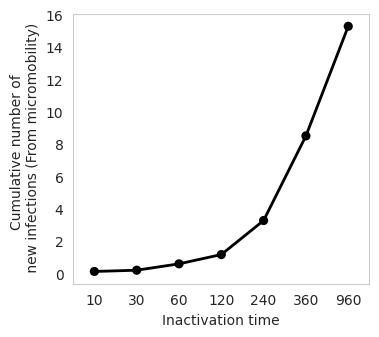

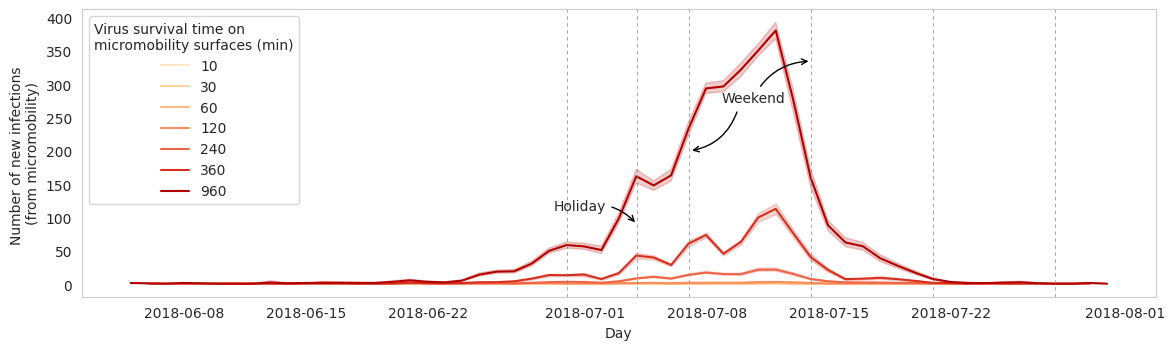

In [ ]:
# Sub-pandel
# List all files in the directory
files = os.listdir()

# Initialize an empty DataFrame for micromobility infections
imsvt = pd.DataFrame(columns=['svt', 'replication', 'start_of_infection', 'Count'])

# Process relevant files
for f in files:
    if 'micro_infections_svt' in f:
        # Read the CSV file and select columns of interest
        a = pd.read_csv(f, usecols=imsvt.columns)

        # Set column types
        a['start_of_infection'] = pd.to_datetime(a['start_of_infection'])

        # Concatenate with the main DataFrame
        imsvt = pd.concat([imsvt, a], axis=0, ignore_index=True)

imsvt.rename({'start_of_infection': 'time'}, axis=1, inplace=True)


t = imsvt.groupby(['svt', 'replication']).sum()['Count'].reset_index()
t1 = t.groupby('svt').agg({'Count': 'mean', 'Count': 'sem'}).reset_index()

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.1))
plt.tight_layout(pad=4)
sns.set_style("whitegrid", {'axes.grid': False})
sns.pointplot(data=t1, x='svt', y='Count', ax=ax, color='black', scale=0.75)

# Set axis labels
ax.set_xlabel('Inactivation time')
ax.set_ylabel('Cumulative number of \n new infections (From micromobility)')

plt.show()

# Main panel
imsvt['svt'] = imsvt['svt'].astype(str)

# Create a plot
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.tight_layout(pad=3)
sns.set_style("whitegrid", {'axes.grid' : False})

# Plot the data as a lineplot
sns.lineplot(data=imsvt, x='time', y='Count', hue='svt', palette="OrRd")

# Add vertical lines and annotations
vertical_lines = ['2018-06-30 00:00:00', '2018-07-04 00:00:00', '2018-07-07 00:00:00',
                  '2018-07-14 00:00:00', '2018-07-21 00:00:00', '2018-07-28 00:00:00']
for line in vertical_lines:
    ax.axvline(x=parse(line), linewidth=0.5, color='gray', linestyle=(0, (5, 5)))

# Add annotations
annotations = [('Holiday', '2018-07-04 00:00:00', (parse('2018-07-04 00:00:00'), 90), (-60, 10)),
               ('Weekend', '2018-07-14 00:00:00', (parse('2018-07-14 00:00:00'), 335), (-65, -30)),
               (None, '2018-07-07 00:00:00', (parse('2018-07-07 00:00:00'), 200), (35, 30))]

for label, date, xy, xytext in annotations:
    ax.annotate(label, xy=xy, xycoords='data', xytext=xytext, textcoords='offset points', fontsize=10,
                arrowprops=dict(color='black', arrowstyle="->", connectionstyle="arc3,rad=-0.3"))

# Set axis labels and legend position
ax.set_xlabel('Day')
ax.set_ylabel('Number of new infections \n(from micromobility)')
sns.move_legend(ax, "upper left", title='Virus survival time on\nmicromobility surfaces (min)')

# Show the plot
plt.show()

# Figure S3

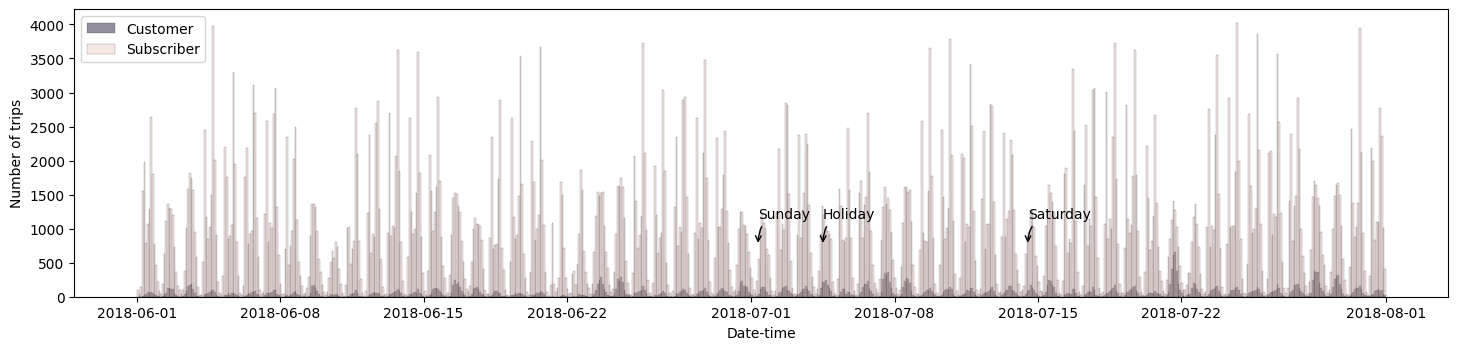

In [3]:
Divvy_data = pd.read_csv('Divvy_data.csv') # June and July 2018
Divvy_data['start_time'] = pd.to_datetime(Divvy_data['start_time'])

# Create a histogram of hourly trips by user type
fig, axs = plt.subplots(1, 1, figsize=(15, 4))
fig.tight_layout(pad=3)
sns.histplot(data=Divvy_data, x='start_time', hue='user_type', ax=axs, color='grey', bins=31*24)

# Add annotations for weekend/holiday
annotations = [
    ('Sunday', dt.datetime(2018, 7, 1, 8, 0, 0)),
    ('Saturday', dt.datetime(2018, 7, 14, 12, 0, 0)),
    ('Holiday', dt.datetime(2018, 7, 4, 12, 0, 0))
]

for label, xy in annotations:
    axs.annotate(label, xy=(xy, 750), xytext=(xy, 1150),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

axs.set(xlabel="Date-time", ylabel="Number of trips")
axs.legend(['Customer', 'Subscriber'])

plt.show()

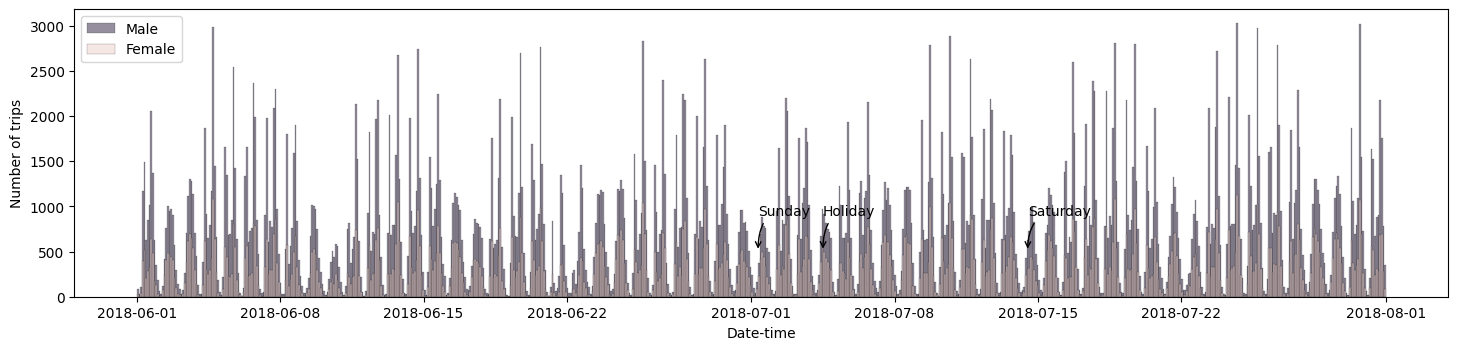

In [6]:
# Create a histogram of hourly trips by member gender for June and July 2018
fig, axs = plt.subplots(1, 1, figsize=(15, 4))
fig.tight_layout(pad=3)
sns.histplot(data=Divvy_data, x='start_time', hue='member_gender', ax=axs, color='grey', bins=31*24)

# Add annotations for weekend/holiday
annotations = [
    ('Sunday', dt.datetime(2018, 7, 1, 8, 0, 0)),
    ('Saturday', dt.datetime(2018, 7, 14, 12, 0, 0)),
    ('Holiday', dt.datetime(2018, 7, 4, 12, 0, 0))
]

for label, xy in annotations:
    axs.annotate(label, xy=(xy, 500), xytext=(xy, 900),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

axs.set(xlabel="Date-time", ylabel="Number of trips")
axs.legend(['Male', 'Female'])

plt.show()


Text(5, 5000, 'Subscriber: Avg speed = 3.76 (m/s), std = 1.26')

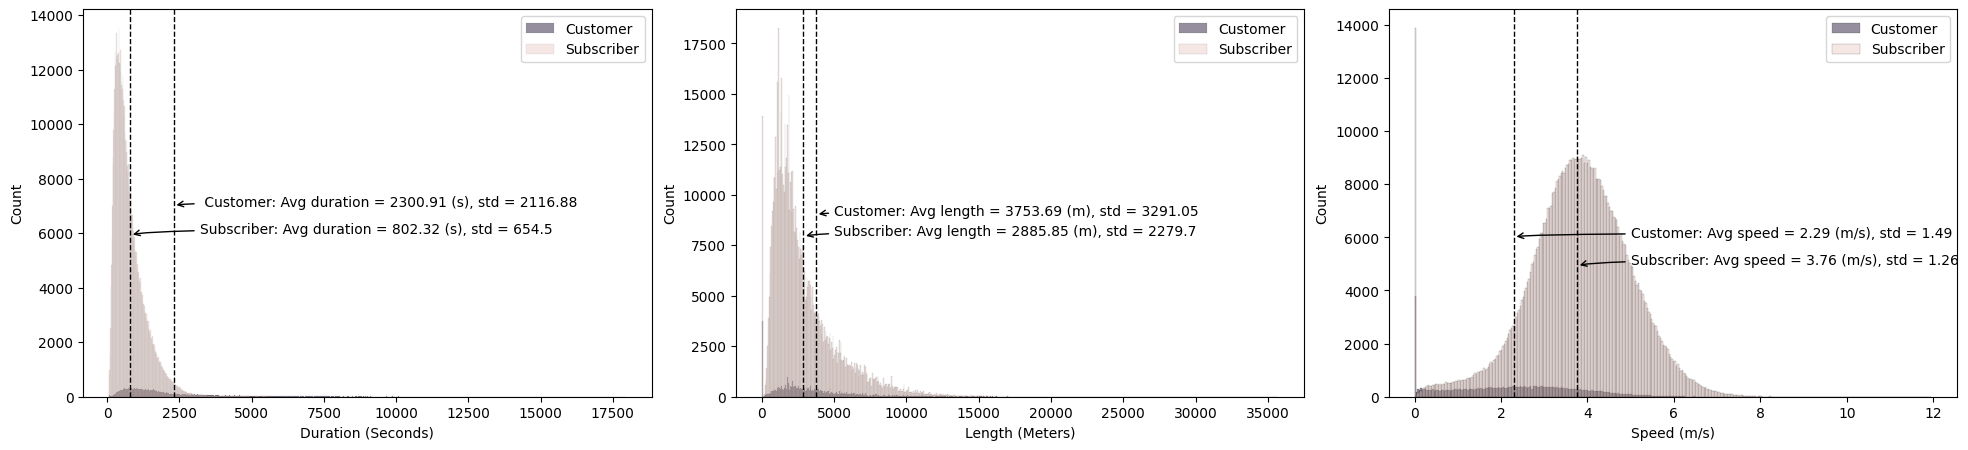

In [8]:
# Usertype mobility statistics, Subscribers
subs_stat = Divvy_data[Divvy_data['user_type'] == 1].describe().loc[['mean', 'std'], ['duration', 'distance', 'speed']]
# Usertype mobility statistics, Customers
cust_stat = Divvy_data[Divvy_data['user_type'] == 2].describe().loc[['mean', 'std'], ['duration', 'distance', 'speed']]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.tight_layout(pad=3)
# trip dwelling time
sns.histplot(data = Divvy_data, x = 'duration', hue = 'user_type', ax=axs[0], color = 'grey')
axs[0].set(xlabel="Duration (Seconds)")
axs[0].legend(['Customer', 'Subscriber'])
axs[0].axvline(cust_stat.loc['mean', 'duration'], color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(subs_stat.loc['mean', 'duration'], color='k', linestyle='dashed', linewidth=1)
axs[0].annotate(' Customer: Avg duration = ' + str(round(cust_stat.loc['mean', 'duration'], 2)) + ' (s)' + ', std = ' + str(round(cust_stat.loc['std', 'duration'], 2)), xy=(cust_stat.loc['mean', 'duration'], 7000), xytext=(3200, 7000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
axs[0].annotate('Subscriber: Avg duration = ' + str(round(subs_stat.loc['mean', 'duration'], 2)) + ' (s)' + ', std = ' + str(round(subs_stat.loc['std', 'duration'], 2)), xy=(subs_stat.loc['mean', 'duration'], 5900), xytext=(3200, 6000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
# trip distance
sns.histplot(data = Divvy_data, x = 'distance', hue = 'user_type', ax=axs[1], color = 'grey')
axs[1].set(xlabel="Length (Meters)")
axs[1].legend(['Customer', 'Subscriber'])
axs[1].axvline(cust_stat.loc['mean', 'distance'], color='k', linestyle='dashed', linewidth=1)
axs[1].axvline(subs_stat.loc['mean', 'distance'], color='k', linestyle='dashed', linewidth=1)
axs[1].annotate('Customer: Avg length = ' + str(round(cust_stat.loc['mean', 'distance'], 2)) + ' (m)' + ', std = ' + str(round(cust_stat.loc['std', 'distance'], 2)), xy=(cust_stat.loc['mean', 'distance'], 9000), xytext=(5000, 9000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
axs[1].annotate('Subscriber: Avg length = ' + str(round(subs_stat.loc['mean', 'distance'], 2)) + ' (m)' + ', std = ' + str(round(subs_stat.loc['std', 'distance'], 2)), xy=(subs_stat.loc['mean', 'distance'], 7900), xytext=(5000, 8000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
# trip distance
sns.histplot(data = Divvy_data, x = 'speed', hue = 'user_type', ax=axs[2], color = 'grey')
axs[2].set(xlabel="Speed (m/s)")
axs[2].legend(['Customer', 'Subscriber'])
axs[2].axvline(cust_stat.loc['mean', 'speed'], color='k', linestyle='dashed', linewidth=1)
axs[2].axvline(subs_stat.loc['mean', 'speed'], color='k', linestyle='dashed', linewidth=1)
axs[2].annotate('Customer: Avg speed = ' + str(round(cust_stat.loc['mean', 'speed'], 2)) + ' (m/s)' ', std = ' + str(round(cust_stat.loc['std', 'speed'], 2)), xy=(cust_stat.loc['mean', 'speed'], 6000), xytext=(5, 6000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
axs[2].annotate('Subscriber: Avg speed = ' + str(round(subs_stat.loc['mean', 'speed'], 2)) + ' (m/s)' + ', std = ' + str(round(subs_stat.loc['std', 'speed'], 2)), xy=(subs_stat.loc['mean', 'speed'], 4900), xytext=(5, 5000),
                arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

# Figure S6

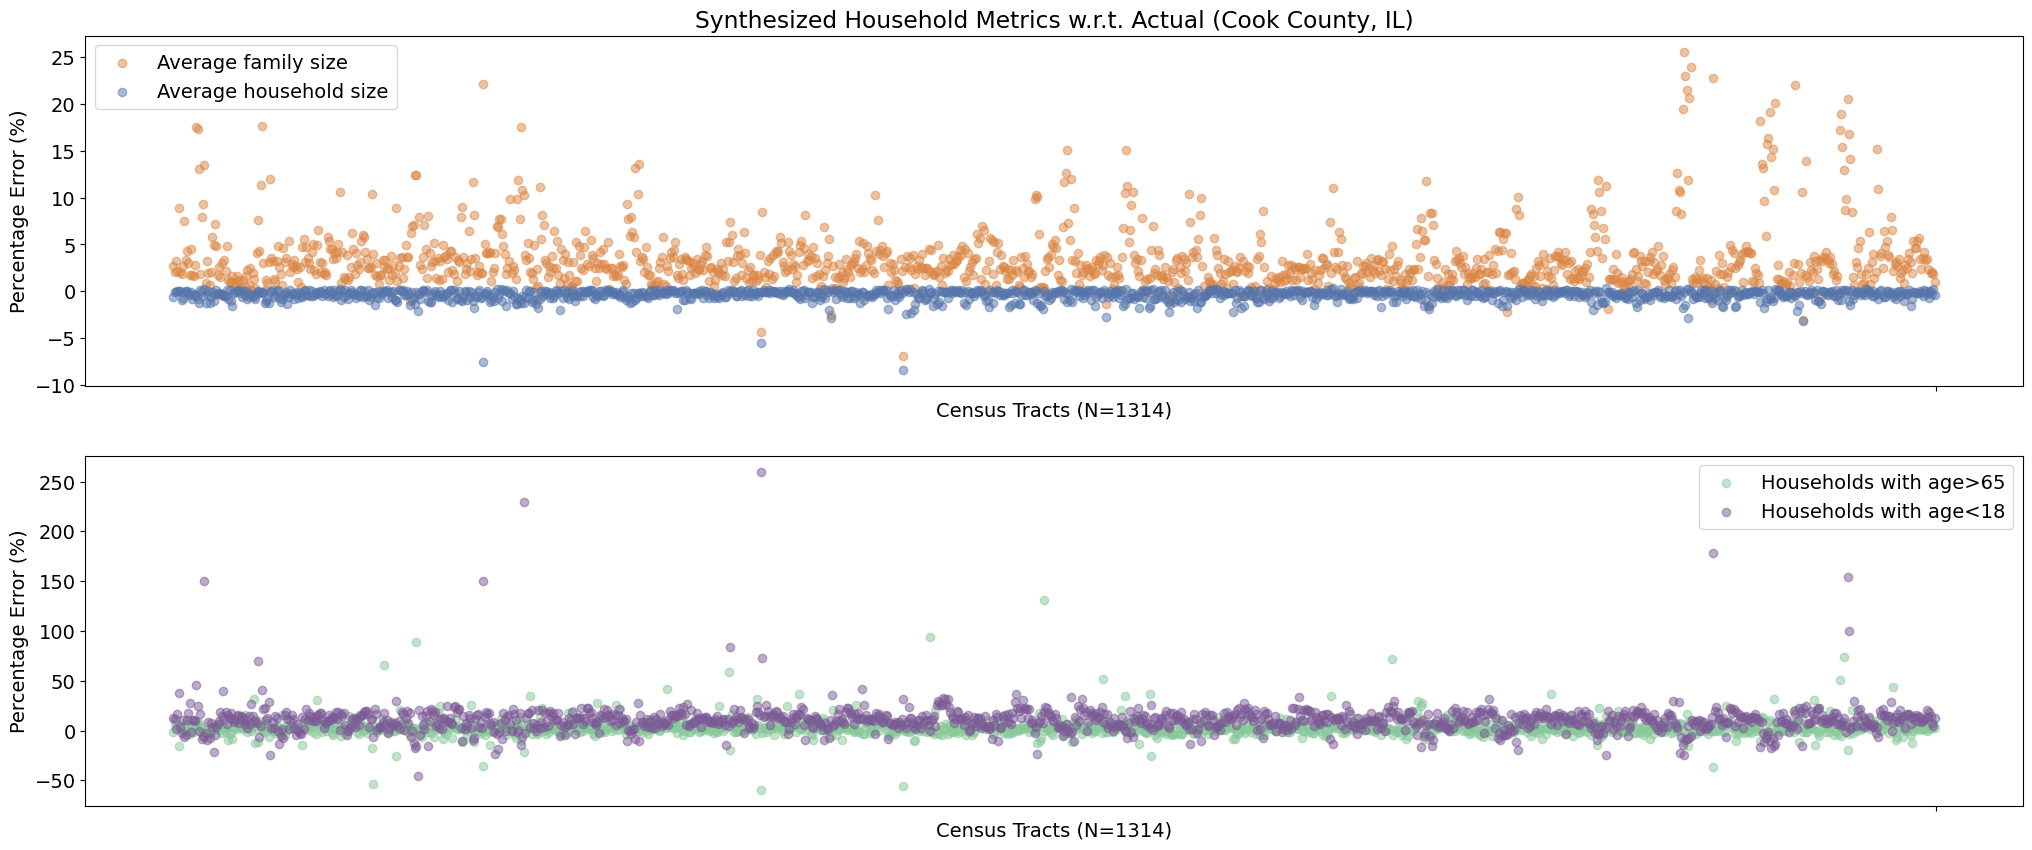

In [3]:
with open('errors.pkl', 'rb') as f:
    errors = pd.concat(pickle.load(f), axis=1).T

plt.rcParams.update({'font.size': 14})
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))

ax1.scatter(errors.index, errors[['avg_family']], alpha=0.5, color = '#db8644')
ax1.scatter(errors.index, errors[['avg_hh']], alpha=0.5, color = '#5575ab',)
ax1.set(xticklabels='', xticks='', xlabel='Census Tracts (N=1314)',ylabel='Percentage Error (%)',
        title='Synthesized Household Metrics w.r.t. Actual (Cook County, IL)')
ax1.legend(labels=['Average family size', 'Average household size'])

ax2.scatter(errors.index, errors[['senior_hh']], alpha=0.5, color = '#88c999',)
ax2.scatter(errors.index, errors[['minor_hh']], alpha=0.5, color = '#7b5a96',)
ax2.set(xticklabels='', xticks='', xlabel='Census Tracts (N=1314)',ylabel='Percentage Error (%)')
ax2.legend(labels=['Households with age>65', 'Households with age<18'])
plt.show(block=False)